# 卷积


稀疏连接与平移不变性，这让计算机视觉的研究取得了长足的进步。

    稀疏连接可以让学习的参数变得很少，
    平移不变性则不关心物体出现在图像中什么位置。

## 最简单的情况


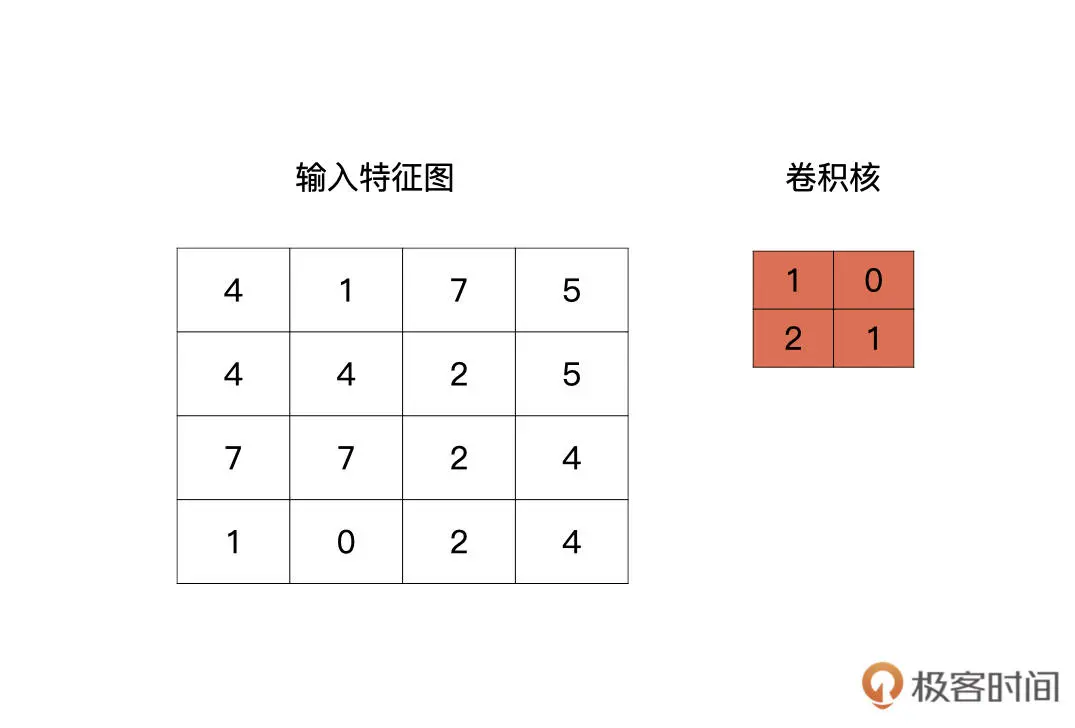
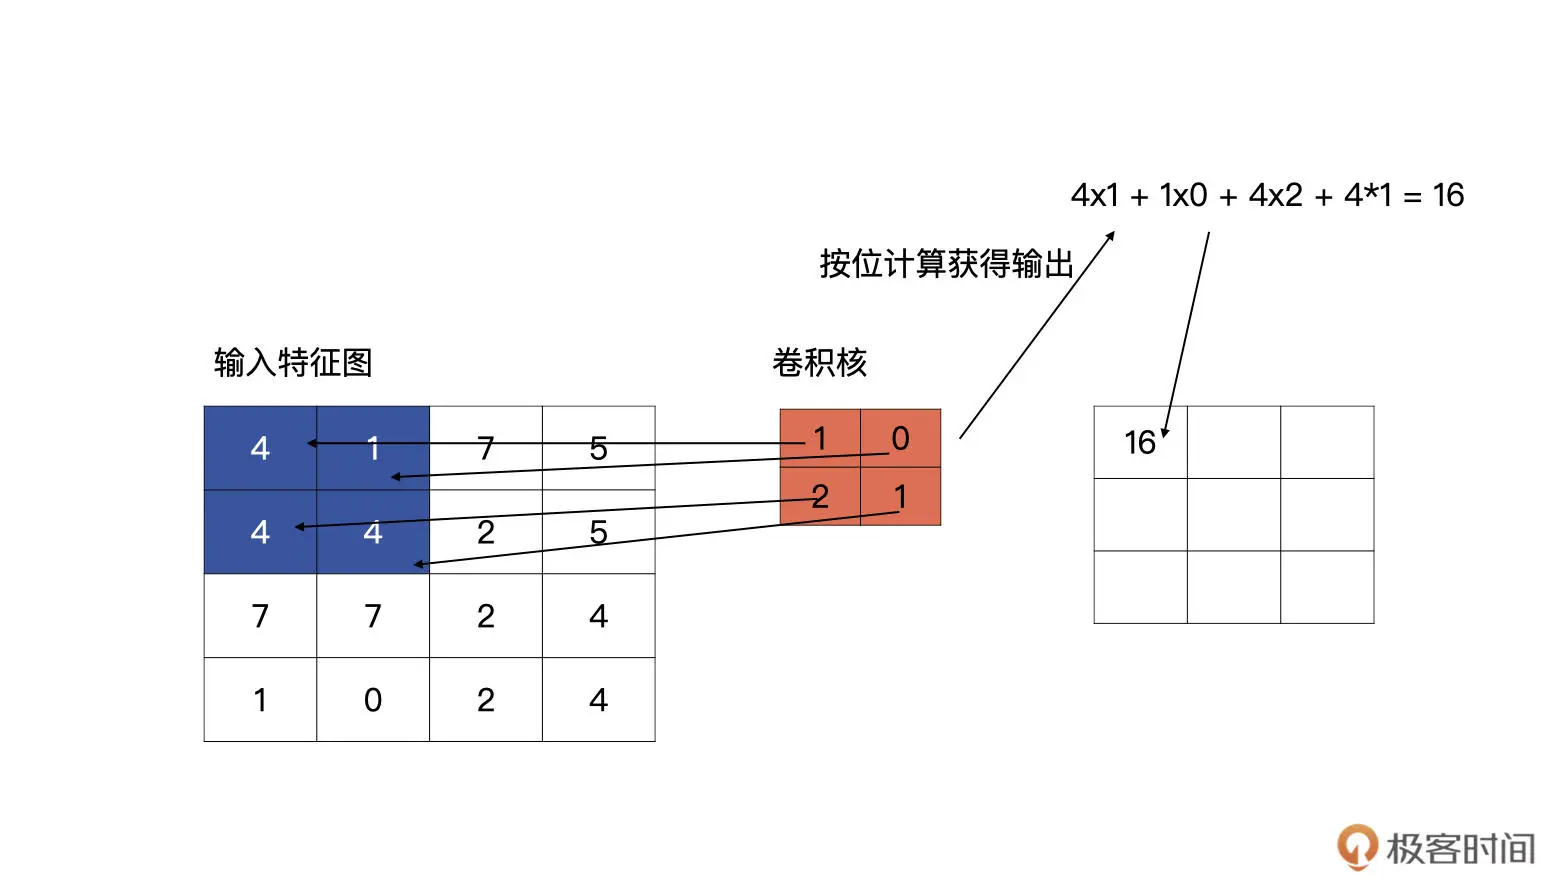

卷积上下左右滑动的长度，我们称为步长，用 stride 表示。

## 标准的卷积
```
    输入的特征有 m 个通道，宽为 w，高为 h；
    输出有 n 个特征图，宽为 w′，高为 h′；
    卷积核的大小为 kxk。
```

```
    **输出特征图的通道数**由**卷积核的个数**决定的，所以说卷积核的个数为 n。
    根据卷积计算的定义，输入特征图有 m 个通道，所以每个卷积核里要也要有 m 个通道。
    所以，我们的需要 n 个卷积核，每个卷积核的大小为 (m, k, k)。
```

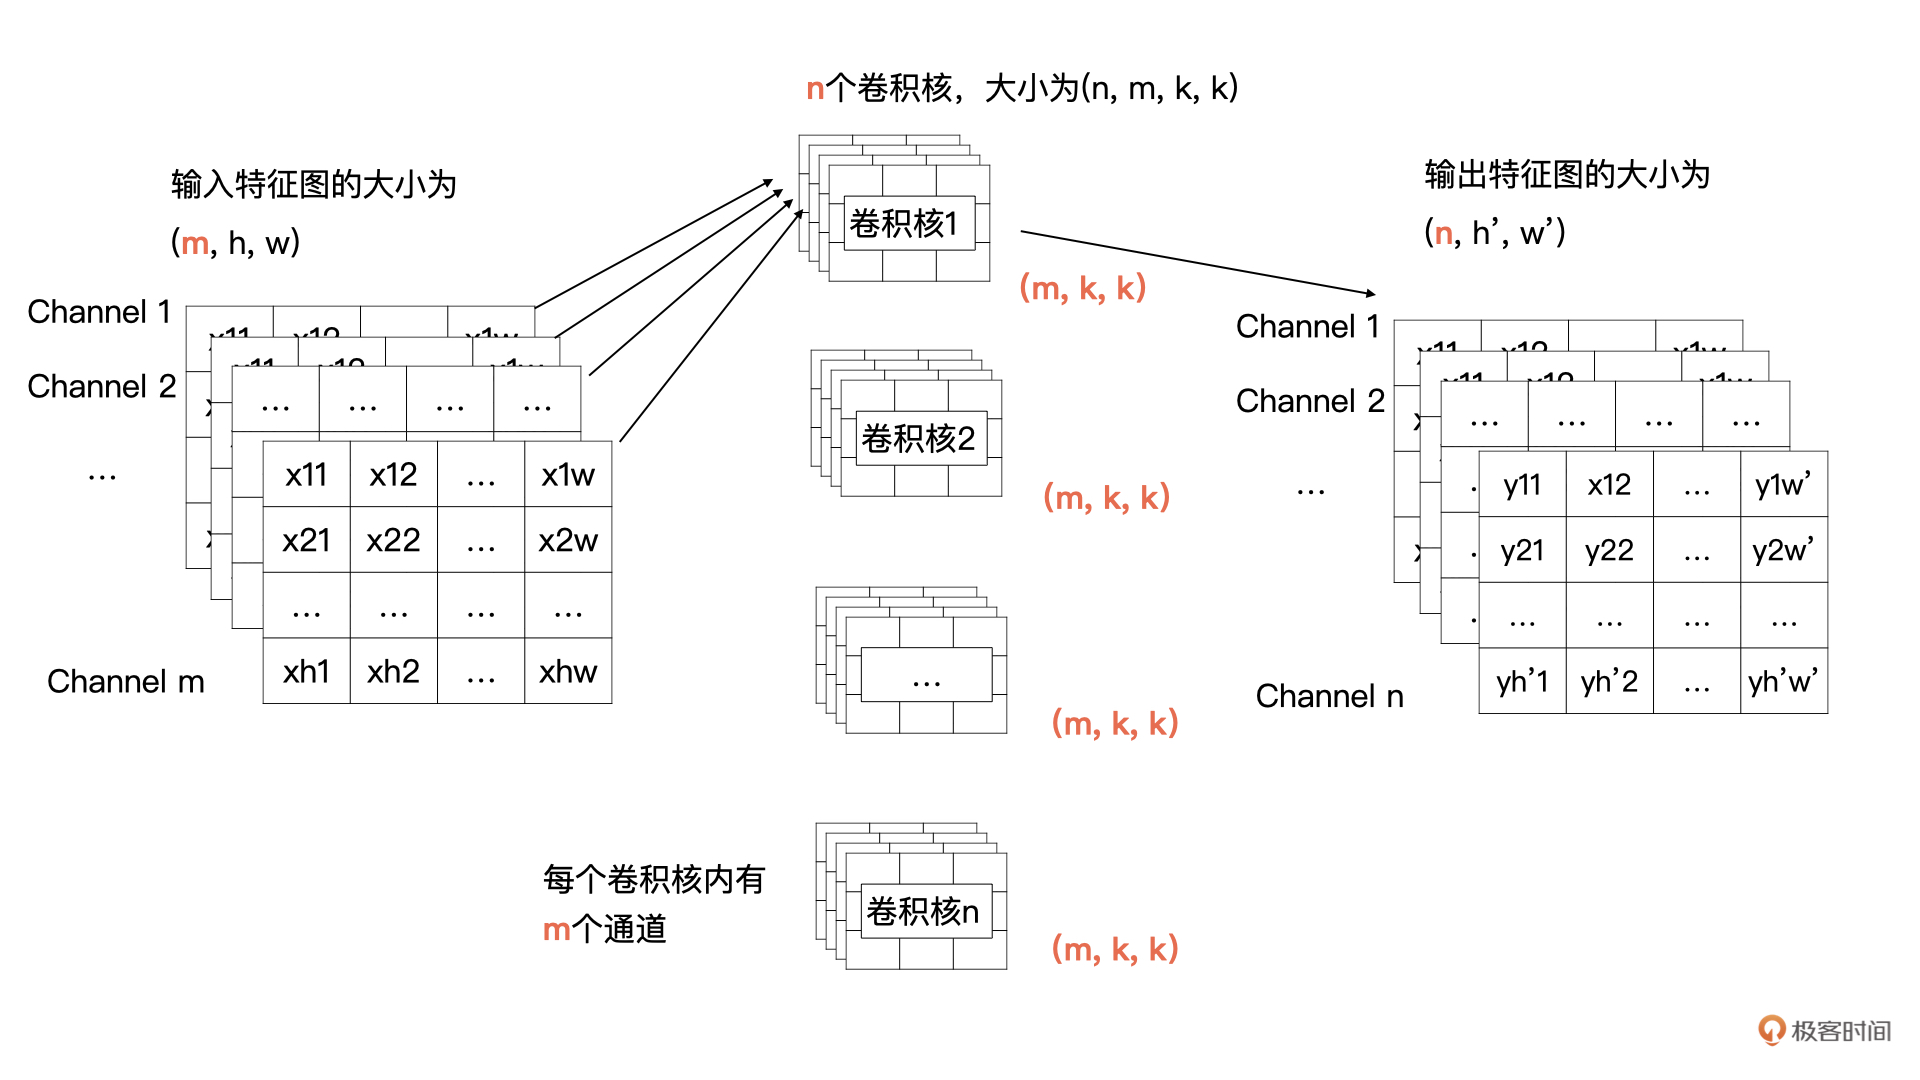


输入特征图中第 i 个特征图与卷积核中的第 i 个通道的数据进行卷积。这样计算后会生成 m 个特征图，然后将这 **m 个特征图按对应位置求和**即可，求和后 m 个特征图**合并为输出特征中一个通道的特征图**。

## Padding

在 Pytorch 中，padding 这个参数可以是字符串、int 和 tuple。

* 字符串

    * ′valid′ 就是没有 padding 操作，就像开头的例子那样。
    * ′same′ 则是让输出的特征图与输入的特征图获得相同的大小。

## PyTorch 中的卷积

卷积操作定义在 torch.nn 模块中，torch.nn 模块为我们提供了很多构建网络的基础层与方法。

上述的例子都是按照 nn.Conv2d 来介绍的，nn.Conv2d 也是用的最多的，而 nn.Conv1d 与 nn.Conv3d 只是输入特征图的维度有所不一样而已，很少会被用到。

In [ ]:

# Conv2d类
class torch.nn.Conv2d(in_channels, 
                      out_channels, 
                      kernel_size, 
                      stride=1, 
                      padding=0, 
                      dilation=1, 
                      groups=1, 
                      bias=True, 
                      padding_mode='zeros', 
                      device=None, 
                      dtype=None)


```
in_channels 是指输入特征图的通道数，数据类型为 int，在标准卷积的讲解中 in_channels 为 m；
out_channels 是输出特征图的通道数，数据类型为 int，在标准卷积的讲解中 out_channels 为 n。
kernel_size 是卷积核的大小，数据类型为 int 或 tuple，需要注意的是只给定卷积核的高与宽即可，在标准卷积的讲解中 kernel_size 为 k。stride 为滑动的步长，数据类型为 int 或 tuple，默认是 1，在前面的例子中步长都为 1。
padding 为补零的方式，注意当 padding 为’valid’或’same’时，stride 必须为 1。
对于 kernel_size、stride、padding 都可以是 tuple 类型，当为 tuple 类型时，第一个维度用于 height 的信息，第二个维度时用于 width 的信息。
bias 是否使用偏移项。
还有两个参数：dilation 与 groups，具体内容下节课我们继续展开讲解，你先有个印象就行。

## 验证 same 方式

* 创建输入特征图
* 设置卷积
* 输出结果

In [1]:
import torch
import torch.nn as nn

input_feat = torch.tensor([[4, 1, 7, 5], [4, 4, 2, 5], [7, 7, 2, 4], [1, 0, 2, 4]], dtype=torch.float32)
print(input_feat)
print(input_feat.shape)


tensor([[4., 1., 7., 5.],
        [4., 4., 2., 5.],
        [7., 7., 2., 4.],
        [1., 0., 2., 4.]])
torch.Size([4, 4])


In [2]:

conv2d = nn.Conv2d(1, 1, (2, 2), stride=1, padding='same', bias=True)
# 默认情况随机初始化参数
print(conv2d.weight)
print(conv2d.bias)


Parameter containing:
tensor([[[[0.4563, 0.4395],
          [0.0019, 0.3635]]]], requires_grad=True)
Parameter containing:
tensor([-0.4167], requires_grad=True)


In [9]:
input_feat = input_feat.unsqueeze(axis = 0)
conv2d = nn.Conv2d(1, 1, (2, 2), stride=1, padding='same', bias=False)
# 卷积核要有四个维度(输入通道数，输出通道数，高，宽)
kernels = torch.tensor([[[[1, 0], [2, 1]]]], dtype=torch.float32)
conv2d.weight = nn.Parameter(kernels, requires_grad=False)
print(conv2d.weight)
print(conv2d.bias)
print(kernels.shape)

Parameter containing:
tensor([[[[1., 0.],
          [2., 1.]]]])
None
torch.Size([1, 1, 2, 2])


In [8]:
output = conv2d(input_feat)
output


tensor([[[16., 11., 16., 15.],
         [25., 20., 10., 13.],
         [ 9.,  9., 10., 12.],
         [ 1.,  0.,  2.,  4.]]])

# 小结

# 每日一练

请你想一想，padding 为’same’时，stride 可以为 1 以外的数值吗？


# QA


提前确定好的卷积参数，一般用在图像处理中，例如高斯blur等操作，都是事先确定好卷积参数的。


# todo


高斯blur